# Part 1 - reading the iris data set

First we read in the data. We can do everything with the training set, X_train and y_train. X_test and y_test should be handled with care. 

In [14]:
import numpy as np

# We use the same functions as shown in exercise 2
X_train = np.loadtxt('iris_train.data', delimiter=' ', dtype=float)
y_train = np.loadtxt('iris_train.labels', dtype=int)
X_test = np.loadtxt('iris_test.data', delimiter=' ', dtype=float)
y_test = np.loadtxt('iris_test.labels', delimiter=' ', dtype=float)

# Part 2 - classifying the data

Build a classifier and see how it works on the training data. 

In [15]:
# [Section 2.] Classifying the data

""" Based on the plots from Step 3. ("look at the noteboooks"), it appears 
that Feature 2 and 3 do the best job of classification. In this Feature 
Selection task, We are mainly interested in the features that can best 
classify the flower into the 3 classes. """

def classify(x):
    if x[-2] < 2.8 and x[-1] < 0.8:  # class 1 (label = 0)
        return 0

    elif x[-2] > 4.5 and x[-1] > 1.75:  # class 3 (label = 2)
        return 2

    else:  # class 2 (label =1)
        return 1 

In [16]:
# X_train is a 2d numpy.ndarray
print('X_train type: %s, shape: %s' % (type(X_train), X_train.shape))
# Each element (row) of X_train is ad numpy.ndarray describing one observation
print('x type: %s, shape: %s' % (type(X_train[0]), X_train[0].shape))
# y_train is a 1d numpy.ndarray; each value is the target value for one observation
print('y_train type: %s, shape %s' % (type(y_train), y_train.shape), "\n\n")

# A list for our predictions | [Section 3.] Testing the data
y_hat = np.array([classify(_) for _ in X_train]) #classify all points in X_train
    
# Output our predictions
# print('Predictions:', y_hat)

# Calculate the training error
errors = 0
for y_true, y_pred in zip(y_train, y_hat):
    if y_true != y_pred:
        errors += 1
        
training_error = errors / len(X_train) * 100
print('Training error is %g percent.' % training_error)

X_train type: <class 'numpy.ndarray'>, shape: (100, 4)
x type: <class 'numpy.ndarray'>, shape: (4,)
y_train type: <class 'numpy.ndarray'>, shape (100,) 


Training error is 1 percent.


# Part 3 - test the classifier on unseen data

Once you are happy with your classifier, you can test it on the hidden test set. Make sure that you know what the implications are. 

In [17]:
# A list for our predictions
y_hat = np.array([classify(_) for _ in X_test]) # classify all points in X_test
    
# Output our predictions
#print('Predictions:', y_hat)

# Calculating the test error
errors = 0
error_ID = []
for y_true, y_pred, ID in zip(y_test, y_hat, range(50)):
    if y_true != y_pred:
        errors += 1
        error_ID.append(ID) # contains the index of erros
        
test_error = errors / len(X_test) * 100
print('Test error is %g percent.' % test_error)

Test error is 10 percent.


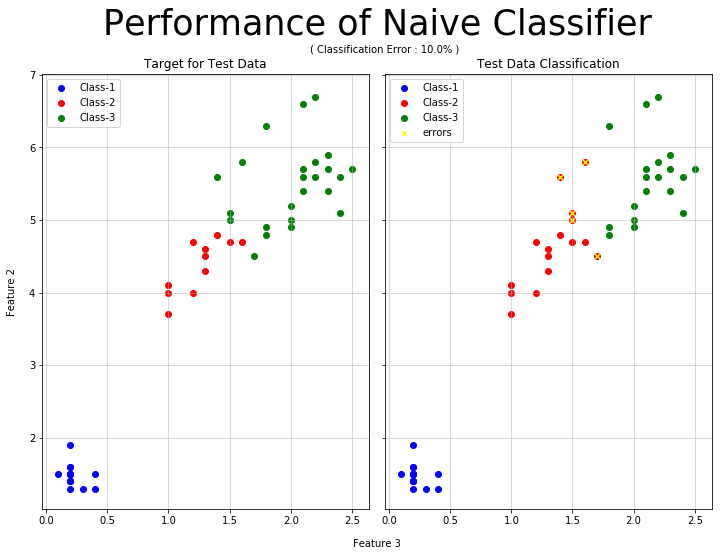

In [18]:
# plotting:

import matplotlib.pyplot as plt


def plot_that():
    fig = plt.figure(1, figsize=(12, 8))
    ax = fig.subplots(1, 2, sharey=True)
    c = ["b", "r", "g"]
    for jj in [0, 1, 2]:
        ax[0].scatter(X_test[np.where(y_test == jj)[0]][:, 3], X_test[np.where(y_test == jj)[0]][:, 2], c=c[jj])
        ax[1].scatter(X_test[np.where(y_hat == jj)[0]][:, 3], X_test[np.where(y_hat == jj)[0]][:, 2], c=c[jj])

    ax[1].scatter( X_test[error_ID][:,3], X_test[error_ID][:,2], marker="x", s = 20, c="yellow")
    # ax[1].axvline(1.7, c="green", linestyle=":")
    # ax[1].axhline(4.5, c="g", linestyle=":")
    # ax[1].axvline(x = 0.8, ymin=0, ymax =2.8, c="b", linestyle="--")
    # ax[1].axhline(2.8, c="b", linestyle="--")

    ax[0].set_title("Target for Test Data")
    ax[0].grid(True, lw=0.5)
    ax[0].legend(["Class-1", "Class-2", "Class-3"], loc=2)
    ax[1].legend(["Class-1", "Class-2", "Class-3", 'errors'], loc=2)
    ax[1].set_title("Test Data Classification")
    ax[1].grid(True, lw=0.5)




    axN = fig.add_subplot(111, frameon=False)
    plt.xlabel("Feature 3", labelpad=30)
    plt.ylabel("Feature 2", labelpad=25)
    plt.title("Performance of Naive Classifier", pad=40, FontSize=35)
    plt.text(0.40, 1.05, "( Classification Error : "+str(test_error)+"% )")
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace=.05)
    plt.show


plot_that()
# fin.


In [19]:
!python3 ./Solution_1__Q7_.py

Q7.1
X:
 [[5 8]
 [2 1]
 [6 7]] 


Y:
 [[5 8 3]
 [2 1 9]] 


Shapes:

 X :  (3, 2)

 Y :  (2, 3)


 X.Y = 
 [[41 48 87]
 [12 17 15]
 [44 55 81]]

Q7.2
The matrix is :
 [[1 2]
 [2 4]]

Eigen values of the matrix are:
 [0. 5.]

Eigen vector of the matrix is :
 [[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]
